<a href="https://colab.research.google.com/github/ossnat/brain2text2025/blob/main/brain2txt_visualise_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
paulnkamau_brain_to_text_25_data_path = kagglehub.dataset_download('paulnkamau/brain-to-text-25-data')

print('Data source import complete.')


100%|██████████| 10.8G/10.8G [08:44<00:00, 22.1MB/s]

Extracting files...


Data source import complete.


In [ ]:
# @title
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import h5py

def load_h5py_file(file_path):
    data = {
        'neural_features': [],
        'n_time_steps': [],
        'seq_class_ids': [],
        'seq_len': [],
        'transcriptions': [],
        'sentence_label': [],
        'session': [],
        'block_num': [],
        'trial_num': [],
    }
    # Open the hdf5 file for that day
    with h5py.File(file_path, 'r') as f:

        keys = list(f.keys())

        # For each trial in the selected trials in that day
        for key in keys:
            g = f[key]

            neural_features = g['input_features'][:]
            n_time_steps = g.attrs['n_time_steps']
            seq_class_ids = g['seq_class_ids'][:] if 'seq_class_ids' in g else None
            seq_len = g.attrs['seq_len'] if 'seq_len' in g.attrs else None
            transcription = g['transcription'][:] if 'transcription' in g else None
            sentence_label = g.attrs['sentence_label'][:] if 'sentence_label' in g.attrs else None
            session = g.attrs['session']
            block_num = g.attrs['block_num']
            trial_num = g.attrs['trial_num']

            data['neural_features'].append(neural_features)
            data['n_time_steps'].append(n_time_steps)
            data['seq_class_ids'].append(seq_class_ids)
            data['seq_len'].append(seq_len)
            data['transcriptions'].append(transcription)
            data['sentence_label'].append(sentence_label)
            data['session'].append(session)
            data['block_num'].append(block_num)
            data['trial_num'].append(trial_num)
    return data



In [ ]:
file_path = '/root/.cache/kagglehub/datasets/paulnkamau/brain-to-text-25-data/versions/3/t15_copyTask_neuralData/hdf5_data_final/t15.2024.03.08/data_train.hdf5'
data = load_h5py_file(file_path)

In [ ]:
data.keys()

dict_keys(['neural_features', 'n_time_steps', 'seq_class_ids', 'seq_len', 'transcriptions', 'sentence_label', 'session', 'block_num', 'trial_num'])

Number of trials: 163

--- Information for Trial 19 ---
Sentence Label: I consider it to be a chore.
Trial Number: 1
Sequence Length: 25
Transcription: [ 73  32  99 111 110 115 105 100 101 114  32 105 116  32 116 111  32  98
 101  32  97  32  99 104 111 114 101  46   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 

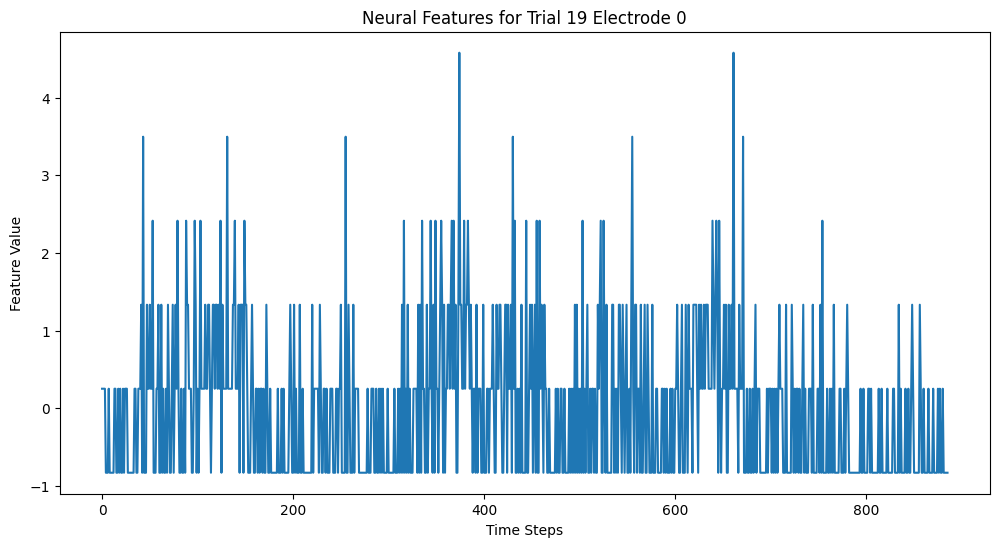

In [ ]:
# Display the number of trials in this session
num_trials = len(data['neural_features'])
print(f"Number of trials: {num_trials}")

# Let the user choose an example index
trial_index = 19
electrode_index = 0

# Display information for the chosen trial
if 0 <= trial_index < num_trials:
    print(f"\n--- Information for Trial {trial_index} ---")
    print(f"Sentence Label: {data['sentence_label'][trial_index]}")
    print(f"Trial Number: {data['trial_num'][trial_index]}")
    print(f"Sequence Length: {data['seq_len'][trial_index]}")
    print(f"Transcription: {data['transcriptions'][trial_index]}")
    print(f"Number of Time Steps: {data['n_time_steps'][trial_index]}")

    # Display the shape of the input 'neural_features' for the chosen trial
    print(f"Shape of 'neural_features' for Trial {trial_index}: {data['neural_features'][trial_index].shape}")

    # Plot the neural features for the chosen trial
    import matplotlib.pyplot as plt

    neural_features_single_trial = data['neural_features'][trial_index]

    plt.figure(figsize=(12, 6))
    plt.plot(neural_features_single_trial[:,electrode_index])
    plt.title(f'Neural Features for Trial {trial_index} Electrode {electrode_index}')
    plt.xlabel('Time Steps')
    plt.ylabel('Feature Value')
    plt.show()

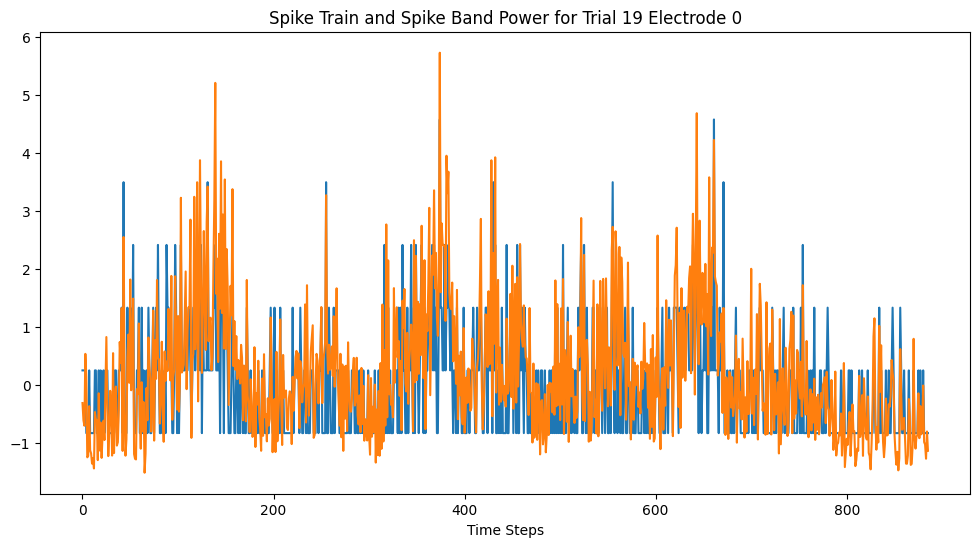

In [ ]:
# visualise correlation between spike_train (from threshold method) and spike-band power

trial = 19 # choose
electrode = 0 # choose between 0-255

spike_train = data['neural_features'][trial][:,electrode]
spike_band_power = data['neural_features'][trial][:,electrode+256]

plt.figure(figsize=(12, 6))
plt.plot(spike_train)
plt.plot(spike_band_power)
plt.title(f'Spike Train and Spike Band Power for Trial {trial} Electrode {electrode}')
plt.xlabel('Time Steps')
plt.show()

# Try to evaluate model using the pretrained RNN

Clone the NEJM git repositary

In [ ]:
!git clone https://github.com/Neuroprosthetics-Lab/nejm-brain-to-text

Cloning into 'nejm-brain-to-text'...
remote: Enumerating objects: 2977, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 2977 (delta 10), reused 19 (delta 4), pack-reused 2932 (from 1)
Receiving objects: 100% (2977/2977), 81.30 MiB | 12.09 MiB/s, done.
Resolving deltas: 100% (397/397), done.


Move the files around to be in correct location

In [ ]:
!mv /root/.cache/kagglehub/datasets/paulnkamau/brain-to-text-25-data/versions/3/* /content/nejm-brain-to-text/data/
!mv /content/nejm-brain-to-text/data/t15_pretrained_rnn_baseline/t15_pretrained_rnn_baseline/* /content/nejm-brain-to-text/data/t15_pretrained_rnn_baseline/
!rmdir /content/nejm-brain-to-text/data/t15_pretrained_rnn_baseline/t15_pretrained_rnn_baseline

!pip install redis

In [ ]:
%cd /content/nejm-brain-to-text/model_training
import os
import torch
import numpy as np
import pandas as pd
import redis
from omegaconf import OmegaConf
import time
from tqdm import tqdm
import editdistance
# from evaluate_model_helpers import * # This was commented out before, uncomment it to use it


# Define evaluation type and paths directly
model_path = '../data/t15_pretrained_rnn_baseline'  # Path to the pretrained model directory (relative to the current working directory).
data_dir = '../data/t15_copyTask_neuralData/hdf5_data_final'  # Path to the dataset directory (relative to the current working directory).
eval_type = 'val'  # Evaluation type: "val" for validation set, "test" for test set.
csv_path = '../data/t15_copyTaskData_description.csv'  # Path to the CSV file with metadata about the dataset (relative to the current working directory).
gpu_number = 0  # GPU number to use for RNN model inference. Set to -1 to use CPU.


# load csv file
b2txt_csv_df = pd.read_csv(csv_path)

# load model args
model_args = OmegaConf.load(os.path.join(model_path, 'checkpoint/args.yaml'))

# set up gpu device
if torch.cuda.is_available() and gpu_number >= 0:
    if gpu_number >= torch.cuda.device_count():
        raise ValueError(f'GPU number {gpu_number} is out of range. Available GPUs: {torch.cuda.device_count()}')
    device = f'cuda:{gpu_number}'
    device = torch.device(device)
    print(f'Using {device} for model inference.')
else:
    if gpu_number >= 0:
        print(f'GPU number {gpu_number} requested but not available.')
    print('Using CPU for model inference.')
    device = torch.device('cpu')

# define model
model = GRUDecoder(
    neural_dim = model_args['model']['n_input_features'],
    n_units = model_args['model']['n_units'],
    n_days = len(model_args['dataset']['sessions']),
    n_classes = model_args['dataset']['n_classes'],
    rnn_dropout = model_args['model']['rnn_dropout'],
    input_dropout = model_args['model']['input_network']['input_layer_dropout'],
    n_layers = model_args['model']['n_layers'],
    patch_size = model_args['model']['patch_size'],
    patch_stride = model_args['model']['patch_stride'],
)

# load model weights
checkpoint = torch.load(os.path.join(model_path, 'checkpoint/best_checkpoint'), weights_only=False, map_location=device)
# rename keys to not start with "module." (happens if model was saved with DataParallel)
for key in list(checkpoint['model_state_dict'].keys()):
    checkpoint['model_state_dict'][key.replace("module.", "")] = checkpoint['model_state_dict'].pop(key)
    checkpoint['model_state_dict'][key.replace("_orig_mod.", "")] = checkpoint['model_state_dict'].pop(key)
model.load_state_dict(checkpoint['model_state_dict'])

# add model to device
model.to(device)

# set model to eval mode
model.eval()

# load data for each session
test_data = {}
total_test_trials = 0
for session in model_args['dataset']['sessions']:
    files = [f for f in os.listdir(os.path.join(data_dir, session)) if f.endswith('.hdf5')]
    if f'data_{eval_type}.hdf5' in files:
        eval_file = os.path.join(data_dir, session, f'data_{eval_type}.hdf5')

        data = load_h5py_file(eval_file, b2txt_csv_df)
        test_data[session] = data

        total_test_trials += len(test_data[session]["neural_features"])
        print(f'Loaded {len(test_data[session]["neural_features"])} {eval_type} trials for session {session}.')
print(f'Total number of {eval_type} trials: {total_test_trials}')
print()


# put neural data through the pretrained model to get phoneme predictions (logits)
with tqdm(total=total_test_trials, desc='Predicting phoneme sequences', unit='trial') as pbar:
    for session, data in test_data.items():

        data['logits'] = []
        data['pred_seq'] = []
        input_layer = model_args['dataset']['sessions'].index(session)

        for trial in range(len(data['neural_features'])):
            # get neural input for the trial
            neural_input = data['neural_features'][trial]

            # add batch dimension
            neural_input = np.expand_dims(neural_input, axis=0)

            # convert to torch tensor
            # Convert to float32 as bfloat16 is not supported on CPU
            neural_input = torch.tensor(neural_input, device=device, dtype=torch.float32)


            # run decoding step
            logits = runSingleDecodingStep(neural_input, input_layer, model, model_args, device)
            data['logits'].append(logits)

            pbar.update(1)
pbar.close()


# convert logits to phoneme sequences and print them out
for session, data in test_data.items():
    data['pred_seq'] = []
    for trial in range(len(data['logits'])):
        logits = data['logits'][trial][0]
        pred_seq = np.argmax(logits, axis=-1)
        # remove blanks (0)
        pred_seq = [int(p) for p in pred_seq if p != 0]
        # remove consecutive duplicates
        pred_seq = [pred_seq[i] for i in range(len(pred_seq)) if i == 0 or pred_seq[i] != pred_seq[i-1]]
        # convert to phonemes
        pred_seq = [LOGIT_TO_PHONEME[p] for p in pred_seq]
        # add to data
        data['pred_seq'].append(pred_seq)

        # print out the predicted sequences
        block_num = data['block_num'][trial]
        trial_num = data['trial_num'][trial]
        print(f'Session: {session}, Block: {block_num}, Trial: {trial_num}')
        if eval_type == 'val':
            sentence_label = data['sentence_label'][trial]
            true_seq = data['seq_class_ids'][trial][0:data['seq_len'][trial]]
            true_seq = [LOGIT_TO_PHONEME[p] for p in true_seq]

            print(f'Sentence label:      {sentence_label}')
            print(f'True sequence:       {" ".join(true_seq)}')
        print(f'Predicted Sequence:  {" ".join(pred_seq)}')
        print()


# language model inference via redis
# make sure that the standalone language model is running on the localhost redis ip
# see README.md for instructions on how to run the language model
r = redis.Redis(host='localhost', port=6379, db=0)
r.flushall()  # clear all streams in redis

# define redis streams for the remote language model
remote_lm_input_stream = 'remote_lm_input'
remote_lm_output_partial_stream = 'remote_lm_output_partial'
remote_lm_output_final_stream = 'remote_lm_output_final'

# set timestamps for last entries seen in the redis streams
remote_lm_output_partial_lastEntrySeen = get_current_redis_time_ms(r)
remote_lm_output_final_lastEntrySeen = get_current_redis_time_ms(r)
remote_lm_done_resetting_lastEntrySeen = get_current_redis_time_ms(r)
remote_lm_done_finalizing_lastEntrySeen = get_current_redis_time_ms(r)
remote_lm_done_updating_lastEntrySeen = get_current_redis_time_ms(r)

lm_results = {
    'session': [],
    'block': [],
    'trial': [],
    'true_sentence': [],
    'pred_sentence': [],
}

# loop through all trials and put logits into the remote language model to get text predictions
# note: this takes ~15-20 minutes to run on the entire test split with the 5-gram LM + OPT rescoring (RTX 4090)
with tqdm(total=total_test_trials, desc='Running remote language model', unit='trial') as pbar:
    for session in test_data.keys():
        for trial in range(len(test_data[session]['logits'])):
            # get trial logits and rearrange them for the LM
            logits = rearrange_speech_logits_pt(test_data[session]['logits'][trial])[0]

            # reset language model
            remote_lm_done_resetting_lastEntrySeen = reset_remote_language_model(r, remote_lm_done_resetting_lastEntrySeen)

            '''
            # update language model parameters
            remote_lm_done_updating_lastEntrySeen = update_remote_lm_params(
                r,
                remote_lm_done_updating_lastEntrySeen,
                acoustic_scale=0.35,
                blank_penalty=90.0,
                alpha=0.55,
            )
            '''

            # put logits into LM
            remote_lm_output_partial_lastEntrySeen, decoded = send_logits_to_remote_lm(
                r,
                remote_lm_input_stream,
                remote_lm_output_partial_stream,
                remote_lm_output_partial_lastEntrySeen,
                logits,
            )

            # finalize remote LM
            remote_lm_output_final_lastEntrySeen, lm_out = finalize_remote_lm(
                r,
                remote_lm_output_final_stream,
                remote_lm_output_final_lastEntrySeen,
            )

            # get the best candidate sentence
            best_candidate_sentence = lm_out['candidate_sentences'][0]

            # store results
            lm_results['session'].append(session)
            lm_results['block'].append(test_data[session]['block_num'][trial])
            lm_results['trial'].append(test_data[session]['trial_num'][trial])
            if eval_type == 'val':
                lm_results['true_sentence'].append(test_data[session]['sentence_label'][trial])
            else:
                lm_results['true_sentence'].append(None)
            lm_results['pred_sentence'].append(best_candidate_sentence)

            # update progress bar
            pbar.update(1)
pbar.close()


# if using the validation set, lets calculate the aggregate word error rate (WER)
if eval_type == 'val':
    total_true_length = 0
    total_edit_distance = 0

    lm_results['edit_distance'] = []
    lm_results['num_words'] = []

    for i in range(len(lm_results['pred_sentence'])):
        true_sentence = remove_punctuation(lm_results['true_sentence'][i]).strip()
        pred_sentence = remove_punctuation(lm_results['pred_sentence'][i]).strip()
        ed = editdistance.eval(true_sentence.split(), pred_sentence.split())

        total_true_length += len(true_sentence.split())
        total_edit_distance += ed

        lm_results['edit_distance'].append(ed)
        lm_results['num_words'].append(len(true_sentence.split()))

        print(f'{lm_results["session"][i]} - Block {lm_results["block"][i]}, Trial {lm_results["trial"][i]}')
        print(f'True sentence:       {true_sentence}')
        print(f'Predicted sentence:  {pred_sentence}')
        print(f'WER: {ed} / {100 * len(true_sentence.split())} = {ed / len(true_sentence.split()):.2f}%')
        print()

    print(f'Total true sentence length: {total_true_length}')
    print(f'Total edit distance: {total_edit_distance}')
    print(f'Aggregate Word Error Rate (WER): {100 * total_edit_distance / total_true_length:.2f}%')


# write predicted sentences to a csv file. put a timestamp in the filename (YYYYMMDD_HHMMSS)
output_file = os.path.join(model_path, f'baseline_rnn_{eval_type}_predicted_sentences_{time.strftime("%Y%m%d_%H%M%S")}.csv')
ids = [i for i in range(len(lm_results['pred_sentence']))]
df_out = pd.DataFrame({'id': ids, 'text': lm_results['pred_sentence']})
df_out.to_csv(output_file, index=False)

/content/nejm-brain-to-text/model_training
Using cuda:0 for model inference.
Loaded 35 val trials for session t15.2023.08.13.
Loaded 49 val trials for session t15.2023.08.18.
Loaded 48 val trials for session t15.2023.08.20.
Loaded 25 val trials for session t15.2023.08.25.
Loaded 25 val trials for session t15.2023.08.27.
Loaded 49 val trials for session t15.2023.09.01.
Loaded 34 val trials for session t15.2023.09.03.
Loaded 35 val trials for session t15.2023.09.24.
Loaded 48 val trials for session t15.2023.09.29.
Loaded 44 val trials for session t15.2023.10.01.
Loaded 36 val trials for session t15.2023.10.06.
Loaded 17 val trials for session t15.2023.10.08.
Loaded 44 val trials for session t15.2023.10.13.
Loaded 44 val trials for session t15.2023.10.15.
Loaded 9 val trials for session t15.2023.10.20.
Loaded 33 val trials for session t15.2023.10.22.
Loaded 50 val trials for session t15.2023.11.03.
Loaded 15 val trials for session t15.2023.11.04.
Loaded 25 val trials for session t15.2023.

Predicting phoneme sequences: 100%|██████████| 1426/1426 [00:37<00:00, 37.66trial/s]


Session: t15.2023.08.13, Block: 8, Trial: 0
Sentence label:      You can see the code at this point as well.
True sequence:       Y UW  |  K AE N  |  S IY  |  DH AH  |  K OW D  |  AE T  |  DH IH S  |  P OY N T  |  AE Z  |  W EH L  | 
Predicted Sequence:  Y UW  |  K AE N  |  S IY  |  DH AH  |  K OW D  |  AE T  |  DH IH S  |  P OY N T  |  AE Z  |  W IH L  | 

Session: t15.2023.08.13, Block: 8, Trial: 1
Sentence label:      How does it keep the cost down?
True sequence:       HH AW  |  D AH Z  |  IH T  |  K IY P  |  DH AH  |  K AA S T  |  D AW N  | 
Predicted Sequence:  HH AW  |  D AH S  |  IH T  |  K IY P  |  DH AH  |  K AA S T  |  T AW N T  | 

Session: t15.2023.08.13, Block: 8, Trial: 2
Sentence label:      Not too controversial.
True sequence:       N AA T  |  T UW  |  K AA N T R AH V ER SH AH L  | 
Predicted Sequence:  N AA T  |  T UW  |  K AE N CH R UW F UW SH AH L  | 

Session: t15.2023.08.13, Block: 8, Trial: 3
Sentence label:      The jury and a judge work together on it.
True se

ConnectionError: Error 99 connecting to localhost:6379. Cannot assign requested address.